In [11]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\prati\AppData\Roaming\Python\Python312\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\prati\AppData\Roaming\Python\Python312\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\prati\AppData\Roaming\Python\Python312\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\User


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [12]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [13]:
data_frame = pd.read_csv(os.path.join('dataset', 'train.csv', 'train.csv'))

In [14]:
data_frame.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
blinker                 1.6.2
certifi                 2024.7.4
charset-normalizer      3.3.2
click                   8.1.7
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.8.5
decorator               5.1.1
executing               2.0.1
filelock                3.18.0
Flask                   2.3.3
flatbuffers             24.3.25
fonttools               4.56.0
fsspec                  2025.3.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.66.0
h5py                    3.11.0
idna                    3.8
importlib-metadata      6.8.0
ipykernel               6.29.5
ipython                 8.26.0
itsdangerous            2.1.2
jedi                    0.19.1
Jinja2                  3.1.2
joblib            

In [16]:
from tensorflow.keras.layers import TextVectorization

In [17]:
comments = data_frame['comment_text']
labels = data_frame[data_frame.columns[2:]].values

In [ ]:
VOCAB_SIZE = 200000 

In [19]:
text_transformer = TextVectorization(max_tokens=VOCAB_SIZE,
                                     output_sequence_length=1800,
                                     output_mode='int')

In [20]:
text_transformer.adapt(comments.values)

In [21]:
vectorized_comments = text_transformer(comments.values)

In [ ]:
dataset_full = tf.data.Dataset.from_tensor_slices((vectorized_comments, labels))
dataset_full = dataset_full.cache()
dataset_full = dataset_full.shuffle(160000)
dataset_full = dataset_full.batch(16)
dataset_full = dataset_full.prefetch(8)  


In [ ]:
total_batches = len(dataset_full)
train_ds = dataset_full.take(int(total_batches * 0.7))
val_ds = dataset_full.skip(int(total_batches * 0.7)).take(int(total_batches * 0.2))
test_ds = dataset_full.skip(int(total_batches * 0.9)).take(int(total_batches * 0.1))


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
toxicity_model = Sequential()

toxicity_model.add(Embedding(VOCAB_SIZE + 1, 32))

toxicity_model.add(Bidirectional(LSTM(32, activation='tanh')))

toxicity_model.add(Dense(128, activation='relu'))
toxicity_model.add(Dense(256, activation='relu'))
toxicity_model.add(Dense(128, activation='relu'))
toxicity_model.add(Dense(6, activation='sigmoid'))

In [26]:
toxicity_model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [27]:
toxicity_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
training_history = toxicity_model.fit(train_ds, epochs=1, validation_data=val_ds)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5389s 770ms/step - loss: 0.0829 - val_loss: 0.0480


In [29]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

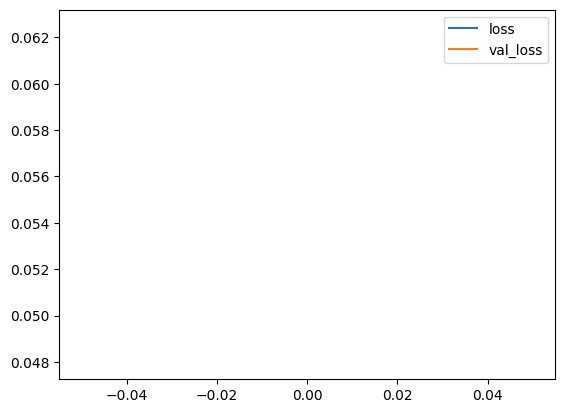

In [30]:
plt.figure(figsize=(8, 5))
pd.DataFrame(training_history.history).plot()
plt.show()

In [31]:
sample_text = "You freaking suck! I am going to hit you."

In [33]:
vectorized_sample = text_transformer(["You freaking suck! I am going to hit you."])
prediction_result = toxicity_model.predict(vectorized_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


In [34]:
binary_output = (prediction_result > 0.5).astype(int)
print("Prediction (binary):", binary_output)

Prediction (binary): [[1 0 1 0 1 0]]


In [35]:
test_features, test_targets = test_ds.as_numpy_iterator().next()

In [36]:
batch_predictions = (toxicity_model.predict(test_features) > 0.5).astype(int)
print("Batch prediction shape:", batch_predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
Batch prediction shape: (16, 6)


In [37]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [38]:
precision_metric = Precision()
recall_metric = Recall()
accuracy_metric = CategoricalAccuracy()

In [39]:
for features_batch, labels_batch in test_ds.as_numpy_iterator():
    predictions = toxicity_model.predict(features_batch)
    
    # Flatten arrays for metric calculation
    true_values = labels_batch.flatten()
    pred_values = predictions.flatten()
    
    precision_metric.update_state(true_values, pred_values)
    recall_metric.update_state(true_values, pred_values)
    accuracy_metric.update_state(true_values, pred_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [40]:
print(f'Precision: {precision_metric.result().numpy()}, Recall: {recall_metric.result().numpy()}, Accuracy: {accuracy_metric.result().numpy()}')

Precision: 0.9081786274909973, Recall: 0.5318836569786072, Accuracy: 0.4924774467945099


In [41]:
!pip install gradio jinja2

  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.27.2-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/51.3 MB ? eta -:--:--
   - -------------------------------------- 1.6/51.3 MB 7.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.9/51.3 MB 7.0 MB/s eta 0:00:07
   --- ------------------------------------ 4.5/51.3 MB 6.9 MB/s eta 0:00:07
   ---- ----------------------------------- 5.5/51.3 MB 6.8 MB/s eta 0:00:07
   ----- ---------------------------------- 7.1/51.3 MB 6.8 MB/s eta 0:00:07
   ------ --------------------------------- 8.7/51.3 MB 6.9 MB/s eta 0:00:07
   ------- -------------------------------- 10.0/51.3 MB 6.8 MB/s eta 0:00:07
   -------- ----------------------------

In [42]:
import tensorflow as tf
import gradio as gr

c:\Users\prati\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
toxicity_model.save('toxicity_model.h5')

In [44]:
toxicity_model = tf.keras.models.load_model('toxicity_model.h5')

In [45]:
test_vector = text_transformer('hey i freaken hate you!')

In [46]:
test_prediction = toxicity_model.predict(np.expand_dims(test_vector, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


In [47]:
print("Test prediction:", test_prediction)

Test prediction: [[0.60395855 0.00583655 0.15950494 0.01365198 0.24069619 0.03993354]]


In [48]:
def evaluate_comment(comment_input):
    processed_text = text_transformer([comment_input])
    prediction_scores = toxicity_model.predict(processed_text)
    
    output_text = ''
    # Iterate through label names (using the original dataframe's column names)
    for idx, label in enumerate(data_frame.columns[2:]):
        output_text += f'{label}: {prediction_scores[0][idx] > 0.5}\n'
    return output_text

In [50]:
interface = gr.Interface(fn=evaluate_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Enter a comment to analyze'),
                         outputs='text')


In [ ]:

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
